# Chapter 6: Temporal Difference Learning

Is a combo of MC and DP ideas. Like MC, TD can learn from raw experience w/ no knowledge of environment dynamics. Like DP, TD methods bootstrap by using other learned estimates to update new estimates. 

## 6.1 TD Prediction

TD and MC use experience to solve the prediction problem. MC methods wait until the return following an episode is known and then use the return to estimate a target for $V(S_t)$, where $V$ is value of a particular state in $v_\pi$. Here's a simple every-visit MC method for nonstationary problems:

$V(S_t) \leftarrow V(S_t) + \alpha [G_t - V(S-t)] \quad (6.1)$

$\alpha$ is a constant step-size parameter and $G_t$ is actual return following time $t$. Name this method $constant-\alpha$ MC. 

Where MC methods have to wait until the return is known at the end of an episode to update $V(S_t)$, TD methods only need to wait until the next timestep. At $t+1$ time they'll immediately form a target value and make an update using the observed reward $R_{t+1}$ and the existing value estimate $V(S_{t+1}$. Simplest TD method goes:

$V(S_t) \leftarrow V(S_t) + \alpha[R_{t+1} + \gamma V(S_{t+1}) - V(S_t)] \quad (6.2)$

This method is called $TD(0)$ or $one-step TD$. 

Algo for TD(0):

Input: $\pi$  
Parameter: $\alpha \in (0, 1]$  
Start $V(s)$ for all $s \in S^+$, arbitrarily except $V(terminal) = 0$

Loop for each episode:  
    $\quad$Initialize S  
    $\quad$Loop for each step of episode:  
        $\quad$$\quad$$A \leftarrow$ action given from $\pi$ for $S$  
        $\quad$$\quad$Take action $A$, observe $R, S'$  
        $\quad$$\quad$$V(S) \leftarrow V(S) + \alpha[R + \gamma V(S') - V(S)]$  
        $\quad$$\quad$$S\leftarrow S'$  
    $\quad$ Until $S$ is terminal.
    

Since TD(0) bases its update partially on an existing estimate, we call it a *bootstrapping* method.

From Chapter 3:

$v_\pi(s) \stackrel{.}{=} \mathbb{E}_\pi[G_t | S_t = s] \quad (6.3)$  
$v_\pi(s) = \mathbb{E}_\pi [R_{t+1} + \gamma G_{t+1} | S_t = s] \quad(by (3.9))$  
$v_\pi(s) = \mathbb{E}_\pi [R_{t+1} + \gamma v_\pi(S_{t+1}) | S_t = s]\quad (6.4)$  

MC methods use estimate of (6.3) as a target, DP use estimate of (6.4) as a target. MC target is an estimate because the real return isn't known, a sample estimate is used in it's place. DP is an estimate because $v_\pi(S_{t+1})$ isn't known and instead an estimate $V(S_{t+1})$ is used. TD is an estimate for both of these reasons, it both samples the expected values in (6.4) and uses estimate $V$ instead of real $v_\pi$. So TD combines sampling of MC with bootstrapping of DP. 

We refer to TD and MC updates as *sample updates* because they involve looking ahead to a sample state, or state-action pair, using the successor and the reward along the way to compute a backed up value and then updating the value of the original state accordingly. **"Sample updates differ from the expected updates in DP methods in that they are based on a single sample successor rather than on a complete distribution of all possible successors."

Observe that the piece of TD(0) in brackets is kind of an error. It measures difference between estimated value of $S_t$ and the superior estimate $R_{t+1} + \gamma V(S_{t+1})$. This is called the TD error and arises in diff. forms throughout RL:

$\delta_t \stackrel{.}{=} R_{t+1} + \gamma V(S_{t+1}) - V(S_t) \quad (6.5)$

TD error at each time step is the error in the estimate at that time. Since the TD error depends on the next state and next reward, it isn't available until one time step later. 

If $V$ doesn't change during episodes (like it doesn't during MC methods), then MC error can be written as a sum of TD errors:

$G_t - V(S_t) = R_{t+1} + \gamma G_{t+1} - V(S_t) + \gamma V(S_{t+1}) - \gamma V(S_{t+1})$  
$G_t - V(S_t) = \delta_t + \gamma(G_{t+1} - V(S_{t+1}))$  
$G_t - V(S_t) = \delta_t + \gamma \delta_{t+1} + \gamma^2 (G_{t+2} - V(S_{t+2}))$  
$G_t - V(S_t) = \delta_t + \gamma \delta_{t+1} + \gamma^2 \delta_{t+2} \dotsb + \gamma^{T-t+1}\delta{T-1} + \gamma^{T-t}(G_T - V(S_T))$  
$G_t - V(S_t) = \delta_t + \gamma \delta_{t+1} + \gamma^2 \delta_{t+2} \dotsb + \gamma^{T-t+1}\delta{T-1} + \gamma^{T-t}(0 - 0)$  
$G_t - V(S_t) = \sum_{k=t}^{T-1} \gamma^{k-t}\delta_t$

This identity is not perfectly exact if the $V$ is updated during the episode like in TD(0), but if step size is sufficiently small then it may hold approximately. 

## 6.2 Advantages of TD Prediction Methods

TD methods bootstrap, aka they update their estimates based partially on other estimates.

They also have advantage over DP since they don't require a model of the environment. Their advantage over MC is that they're fully implemented in an online fashion. MC has to wait unitl the end of the episode to make updates to value estimations while TD has to wait only one time step. Often this is a big deal. Sometimes the task has an extremely long episode, so we can't deal with delaying all learning until ends of episodes because it is too slow. Alternatively, the task could be continuing and have no episodes at all. MC has to ignore or discount experimental actions, so that can slow learning a lot. TD, on the other hand, can learn from all state transitions regardless of which actions are taken.

TD(0) has also been shown to converge to $v_\pi$ in the average of a constant $\alpha$ if it is small enough. and with probability 1 if the step-size decreases according to usual stochastic approximation conditions (2.7). In practice, TD methods usually converge faster than $constant-\alpha$ MC methods on stochastic tasks. 

MCs optimality is limited, TD is optimal in a way more relevant to predicting returns than MC is. 

## 6.4 Sarsa: On Policy TD Control

Follow GPI again for turning to TD control problem. We use TD for the evaluation part this time. 

Start with learning action-value function. For an on-policy method we need to estimate $q_\pi(s,a)$ for current policy $\pi$ and all actions $a$ and states $s$. This can be done using the method above for learning state-value function. Recall an episode is made up of alternating sequence of states and state-action pairs.

In [1]:
from IPython.display import Image

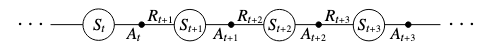

In [2]:
Image(filename='screenshot_6.4.png')

Before we were looking at transitions from state to state and learned state-values. Now we are looking at transitions from state-action pair to state-action pair and learning state-action pair values. These cases are identical because they are both Markov chains with reward processes. The theorems that guarantee convergence of state-values under TD(0) also apply to the corresponding algorithm for action values:

$Q(S_t,A_t) \leftarrow Q(S_t, A_t) + \alpha [R_{t+1} + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t, A_t)] \quad (6.7)$

This is done after every transition from a nonterminal state. If the state is terminal then $Q(S_{t+1}, A_{t+1})$ is equal to zero. This rule uses every element of the following quintuple of elements: $(S_t, A_t, R_{t+1}, S_{t+1}, A_{t+1})$. This quintuple gives rise to the name SARSA. It is simple to design an on-policy control algorithm based on Sarsa. Like in all on-policy methods, we continuously estimate $q_\pi$ for $\pi$ and at the same time make $\pi$ greedy with respect to $q_\pi$. 

Sarsa's convergence depends on the nature of the policy's dependence on $q$. One could use $\varepsilon$-greedy or $\varepsilon$-soft policies. Sarsa converges with guaranteed chance to an optimal policy and action-value function as long as all state-aciton pairs are visited an infinite number of times and the policy converges in the limit to the greedy policy. This can be arranged by setting $\varepsilon = 1/t$.

Algorithm for Sarsa:

Parameters: stepsize $\alpha \in (0, 1]$, small $\varepsilon > 0$
Initialize $Q(s,a)$ for all $s \in S^+, a \in A(s)$, arbitrarily except $Q(terminal, -) =0$

Loop for each episode:  
$\quad$Initialize $S$.  
$\quad$Pick $A$ from $S$ using the policy derived from $Q$  
$\quad$Loop for each step of the episode:  
$\quad$$\quad$Pick action $A$, observe $R, S'$  
$\quad$$\quad$Choose $A'$ from $S'$, using policy derived from $Q$  
$\quad$$\quad$$Q(S,A) \leftarrow Q(S, A) + \alpha[[R_{t+1} + \gamma Q(S', A') - Q(S, A)]$  
$\quad$$\quad$$S\leftarrow S', A \leftarrow A'$  
$\quad$Until $S$ is terminal

## 6.5 Q-Learning: Off-Policy TD Control

Algorithm:

$Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha [R_{t+1} + \gamma max_a Q(S_{t+1}, a) - Q(S_t, A_t)] \quad (6.8)$

Here, Q, the learned action-value function, approximates $q_*$ directly, without relying on a policy. 

The policy still plays a role since it determines which state-action pairs are visited and updated, however, the algorithm still converges as long as all pairs continue to be updated. This is a minimal requirement because all methods that will guarantee to find optimal behavior must require it. Q has been shown to converge with probability 1 to $q_*$ using this algorithm. 

Q-learning (off-policy TD control) for estimating $\pi \approxeq \pi_*$

Parameters: stepsize $\alpha \in (0, 1]$, small $\varepsilon > 0$
Initialize $Q(s,a)$ for all $s \in S^+, a \in A(s)$, arbitrarily except $Q(terminal, -) =0$

Loop for each episode:  
$\quad$Initialize $S$.   
$\quad$Loop for each step of the episode:  
$\quad$$\quad$Choose $A$ from $S$, using policy derived from $Q$  
$\quad$$\quad$Take action $A$, observe $R, S'$  
$\quad$$\quad$$Q(S,A) \leftarrow Q(S, A) + \alpha[R_{t+1} + \gamma max_a Q(S', a) - Q(S, A)]$  
$\quad$$\quad$$S\leftarrow S'$  
$\quad$Until $S$ is terminal

In [70]:
import numpy as np
from collections import defaultdict
import sys
import itertools

In [71]:
class q_learning:
    def __init__(self, alpha, epsilon, gamma, env):
        self.alpha = alpha
        self.eps = epsilon
        self.env = env
        self.gamma = gamma
        self.q = defaultdict(lambda: np.zeros(self.env.action_space.n))
      
    def make_policy(self, Q_, epsilon, num_actions):
        def policy(obs):
            pi = np.ones(num_actions, dtype=float) * epsilon / num_actions
            optimal_action = np.argmax(Q_[obs])
            pi[optimal_action] += 1 - epsilon
            return pi
        return policy
    
    def train(self, epochs):
        ep_reward = np.zeros(epochs)
        ep_length = np.zeros(epochs)
        
        self.policy = self.make_policy(self.q, self.eps, self.env.action_space.n)
        for episode in range(epochs):
            if episode % 100 == 0:
                print('Episode:', episode, '/', epochs)
                sys.stdout.flush
            
            s = self.env.reset()
            
            for t in itertools.count():
                action_probabilities = self.policy(s)
                action_choice = np.random.choice(np.arange(len(action_probabilities)), p=action_probabilities)

                new_s, reward, done, _ = self.env.step(action_choice)

                ep_reward[episode] += reward
                ep_length[episode] = t
                
                opt_next_action = np.argmax(self.q[new_s])
                target = reward + self.gamma * self.q[new_s][opt_next_action]
                delta = target - self.q[s][action_choice]
                self.q[s][action_choice] += self.alpha * delta
                
                if done:
                    break
                
        return self.q, [ep_reward, ep_length]

In [72]:
import gym
import matplotlib.pyplot as plt
env = gym.make('Blackjack-v0')

In [73]:
Q_learn = q_learning(0.5, .1, 1.0, env)

In [76]:
q, track = Q_learn.train(3000)

Episode: 0 / 3000
Episode: 100 / 3000
Episode: 200 / 3000
Episode: 300 / 3000
Episode: 400 / 3000
Episode: 500 / 3000
Episode: 600 / 3000
Episode: 700 / 3000
Episode: 800 / 3000
Episode: 900 / 3000
Episode: 1000 / 3000
Episode: 1100 / 3000
Episode: 1200 / 3000
Episode: 1300 / 3000
Episode: 1400 / 3000
Episode: 1500 / 3000
Episode: 1600 / 3000
Episode: 1700 / 3000
Episode: 1800 / 3000
Episode: 1900 / 3000
Episode: 2000 / 3000
Episode: 2100 / 3000
Episode: 2200 / 3000
Episode: 2300 / 3000
Episode: 2400 / 3000
Episode: 2500 / 3000
Episode: 2600 / 3000
Episode: 2700 / 3000
Episode: 2800 / 3000
Episode: 2900 / 3000


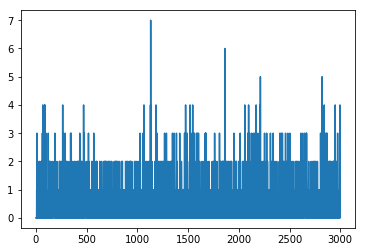

In [78]:
x = np.arange(3000)
plt.plot(x, track[1])

In [ ]:
for i_episode in range(20):
    observation = env.reset()
    for t in range(100):
        env.render()
        print(observation)
        action = env.action_space.sample()
        observation, reward, done, info = env.step(action)
        if done:
            print("Episode finished after {} timesteps".format(t+1))
            break
env.close()